MMDetection 설치

In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

In [ ]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.11.0+cu113 (Tesla P100-PCIE-16GB)


Mask RCNN Pretrained 모델을 활용하여 Inference 

In [ ]:
!cd mmdetection;mkdir Pretrained_Model
!wget -O ./mmdetection/Pretrained_Model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

mkdir: cannot create directory ‘Pretrained_Model’: File exists
--2022-06-19 19:36:49--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘./mmdetection/Pretrained_Model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

./mmdetection/Pretr 100%[===================>] 242.32M  7.97MB/s    in 29s     

2022-06-19 19:37:19 (8.28 MB/s) - ‘./mmdetection/Pretrained_Model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [ ]:
from mmdet.apis import init_detector,inference_detector

config_file="/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py"
pre_model_file="/content/mmdetection/Pretrained_Model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth"

model=init_detector(config_file,pre_model_file)

load checkpoint from local path: /content/mmdetection/Pretrained_Model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [ ]:
!mkdir ./data
!wget -O ./data/car_person_bicycle.jpg https://raw.githubusercontent.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/main/images/car_person_bicycle.jpg

--2022-06-19 19:49:22--  https://raw.githubusercontent.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/main/images/car_person_bicycle.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150407 (147K) [image/jpeg]
Saving to: ‘./data/car_person_bicycle.jpg’

./data/car_person_b 100%[===================>] 146.88K  --.-KB/s    in 0.01s   

2022-06-19 19:49:22 (10.8 MB/s) - ‘./data/car_person_bicycle.jpg’ saved [150407/150407]



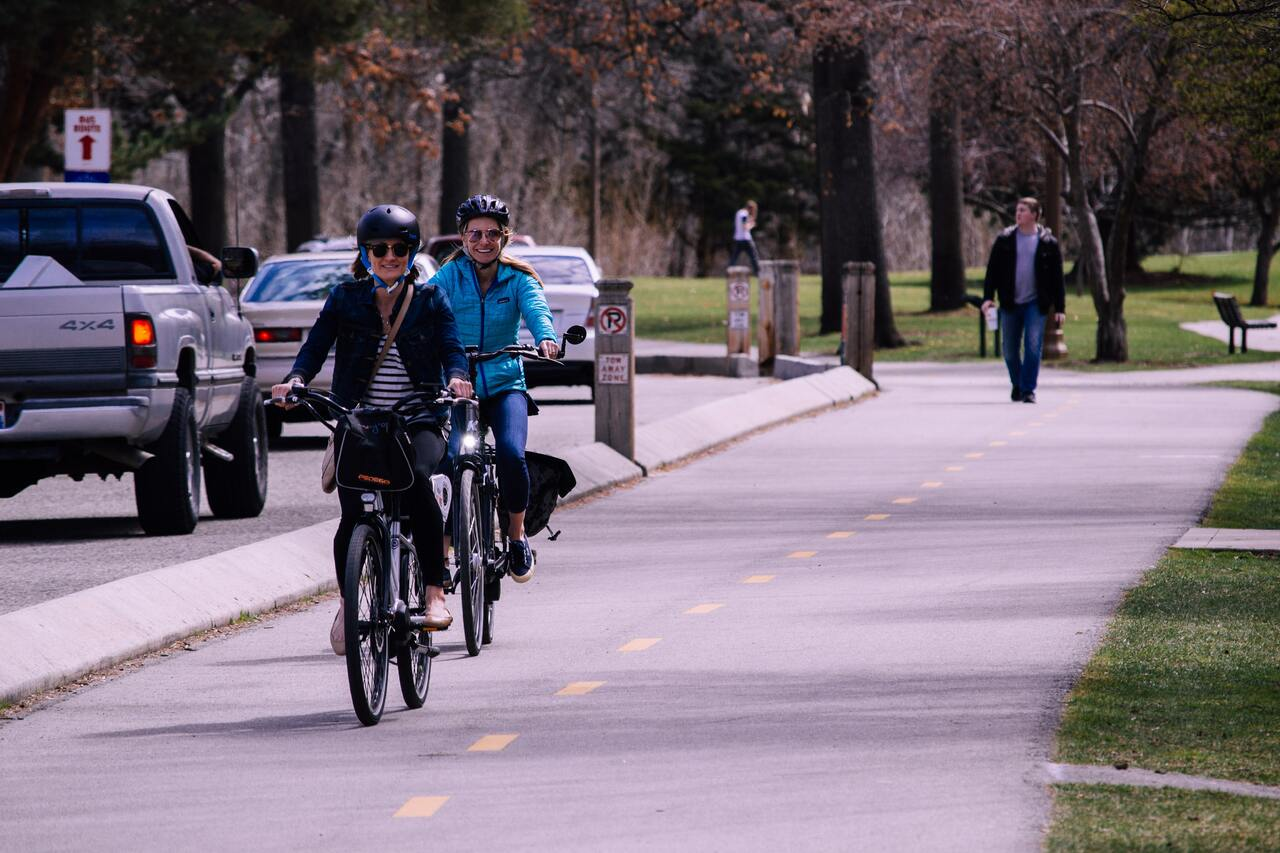

In [ ]:
from IPython.display import Image

Image("/content/data/car_person_bicycle.jpg",width=600)

In [ ]:
import cv2

img_array=cv2.imread("/content/data/car_person_bicycle.jpg")

results=inference_detector(model,img_array)

/usr/local/lib/python3.7/dist-packages/mmdet-2.25.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


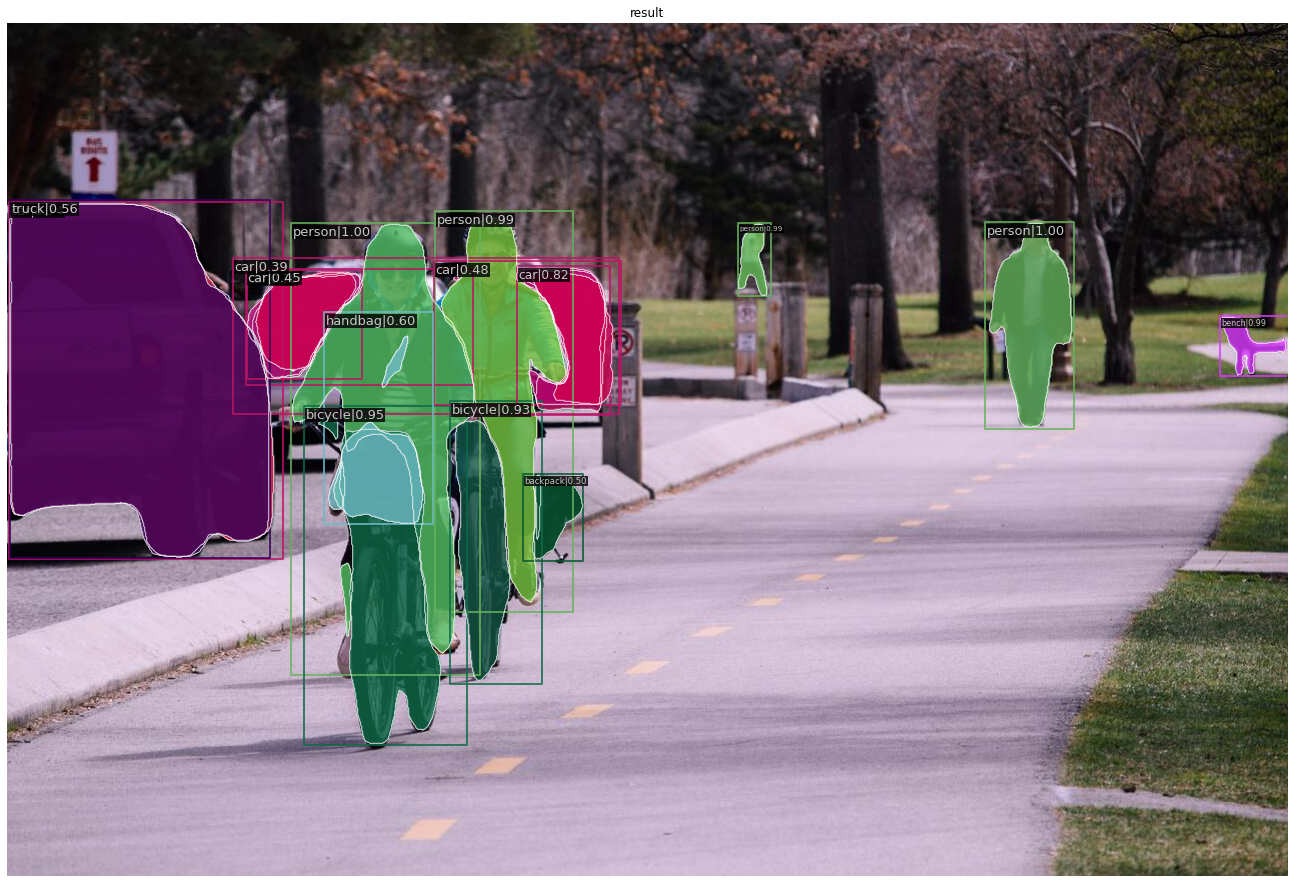

In [ ]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model,img_array,results)

In [ ]:
type(results),len(results)

(tuple, 2)

In [ ]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }


In [ ]:
print("총 inferenced box 개수 : ",len(results[0]))

for i in range(len(results[0])):
  if len(results[0][i])!=0:
    class_name=labels_to_names_seq[i]
    class_box_shape=results[0][i].shape
    object_num=class_box_shape[0]
    print( "class_name : {:15s}  class별 detect된 object 개수 : {:<5} class_name별 box shape : {} ".format(class_name,object_num,class_box_shape))


총 inferenced box 개수 :  80
class_name : person           class별 detect된 object 개수 : 8     class_name별 box shape : (8, 5) 
class_name : bicycle          class별 detect된 object 개수 : 5     class_name별 box shape : (5, 5) 
class_name : car              class별 detect된 object 개수 : 12    class_name별 box shape : (12, 5) 
class_name : motorbike        class별 detect된 object 개수 : 1     class_name별 box shape : (1, 5) 
class_name : truck            class별 detect된 object 개수 : 2     class_name별 box shape : (2, 5) 
class_name : fire hydrant     class별 detect된 object 개수 : 1     class_name별 box shape : (1, 5) 
class_name : bench            class별 detect된 object 개수 : 1     class_name별 box shape : (1, 5) 
class_name : backpack         class별 detect된 object 개수 : 4     class_name별 box shape : (4, 5) 
class_name : handbag          class별 detect된 object 개수 : 5     class_name별 box shape : (5, 5) 
class_name : baseball bat     class별 detect된 object 개수 : 1     class_name별 box shape : (1, 5) 
class_name : skateboard

In [ ]:
print("총 inferenced mask 개수 : ",len(results[1]),"\n")

print("img shape : ",img_array.shape,"\n")

for i in range(len(results[1])):
  if len(results[1][i])!=0:
    mask_num=len(results[1][i])
    print("class_name : {:10s} class별 mask된 object 개수: {:<5}".format(labels_to_names_seq[i],mask_num))
    for j in range(len(results[1][i])):
      print("{}번째 objcet mask shape : {} ".format(j+1,results[1][i][j].shape))
    print()


총 inferenced mask 개수 :  80 

img shape :  (853, 1280, 3) 

class_name : person     class별 mask된 object 개수: 8    
1번째 objcet mask shape : (853, 1280) 
2번째 objcet mask shape : (853, 1280) 
3번째 objcet mask shape : (853, 1280) 
4번째 objcet mask shape : (853, 1280) 
5번째 objcet mask shape : (853, 1280) 
6번째 objcet mask shape : (853, 1280) 
7번째 objcet mask shape : (853, 1280) 
8번째 objcet mask shape : (853, 1280) 

class_name : bicycle    class별 mask된 object 개수: 5    
1번째 objcet mask shape : (853, 1280) 
2번째 objcet mask shape : (853, 1280) 
3번째 objcet mask shape : (853, 1280) 
4번째 objcet mask shape : (853, 1280) 
5번째 objcet mask shape : (853, 1280) 

class_name : car        class별 mask된 object 개수: 12   
1번째 objcet mask shape : (853, 1280) 
2번째 objcet mask shape : (853, 1280) 
3번째 objcet mask shape : (853, 1280) 
4번째 objcet mask shape : (853, 1280) 
5번째 objcet mask shape : (853, 1280) 
6번째 objcet mask shape : (853, 1280) 
7번째 objcet mask shape : (853, 1280) 
8번째 objcet mask shape : (853, 1280) 


(-0.5, 1279.5, 852.5, -0.5)

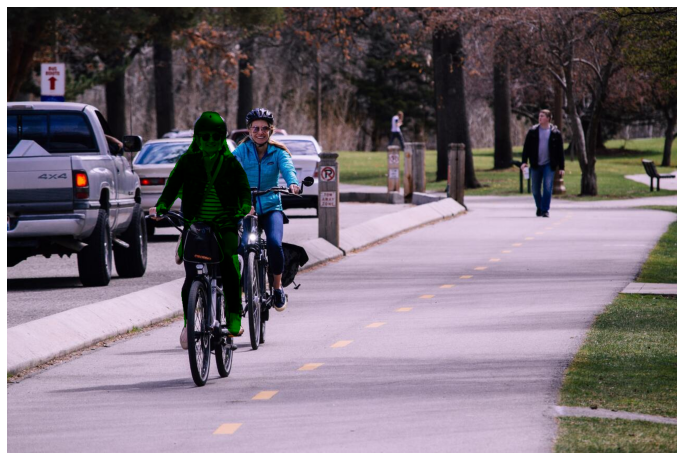

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def apply_mask(image, mask, color, alpha=0.5):
  for c in range(3):
    image[:,:,c]=np.where(mask==1,image[:,:,c]*(1-alpha)*color[c]*255,image[:,:,c])
  return image

draw_img=img_array.copy()
draw_img=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

masked_image=apply_mask(draw_img,results[1][0][1],(0,255,0),alpha=0.5)

plt.figure(figsize=(12, 14))
plt.imshow(masked_image)
plt.axis('off')